<a href="https://colab.research.google.com/github/gkadusumilli/CNN-architectures/blob/main/Fine_tuning_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#To Detect and Classify Brain Tumor using finetuned VGG 16 model (Transfer learning)


####1. Steps to download the dataset from the kaggle

Refer: https://www.kaggle.com/general/74235

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=97a4f86eea53eb3bf2fda5867334c414d88bc4c54bc950ded0502c12aae1e7e3
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
#uploading the kaggle.json files from the download directory
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"adusumilligkrishna","key":"37f590f2031ea6906dc1ac94684f4587"}'}

In [ ]:
#create a new directory
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-14 18:29:44           3951        419  1.0              
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               638KB  2021-01-18 08:45:25           2440        180  1.0              
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           2081         94  1.0              
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Re

###Problem statement: To Detect and Classify Brain Tumor using VGG 16 architecture

Link to the dataset: https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri



In [ ]:
! kaggle datasets download 'sartajbhuvaji/brain-tumor-classification-mri'

 75% 65.0M/86.8M [00:03<00:02, 8.58MB/s]
100% 86.8M/86.8M [00:03<00:00, 26.0MB/s]


In [ ]:
!unzip /content/brain-tumor-classification-mri.zip

####2. Importing the libraries

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
from keras.applications import vgg16
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

####3. Preprocess the data

In [ ]:
#package
!pip install split_folders


In [ ]:
#command to delete the folder
!rm -rf /content/brain_tumor/Testing

In [ ]:
import splitfolders
#split the test folder two validation and testing with ratio of 0.5, 0.5 
splitfolders.ratio("/content/brain_tumor/Testing", output="output", seed=1337, ratio=(0.0, 0.5,0.5))

In [ ]:
#loading the folders
train_path = '/content/brain_tumor/Training'
test_path = '/content/brain_tumor/Testing'
valid_path ='/content/brain_tumor/Validation'

train_batches = ImageDataGenerator().flow_from_directory(train_path,
                                                         target_size=(224,224),
                                                         batch_size=4)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path,
                                                         target_size=(224,224),
                                                         batch_size=30)

test_batches = ImageDataGenerator().flow_from_directory(test_path,
                                                         target_size=(224,224),
                                                         batch_size=50,
                                                         shuffle=False)


Found 2870 images belonging to 4 classes.
Found 196 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


####4. Data visualization





Images of glioma tumor: A type of tumour that occurs in the brain and spinal cord.


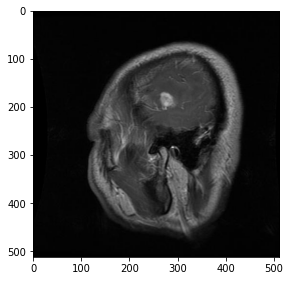

Images of glioma tumor: A type of tumour that occurs in the brain and spinal cord.


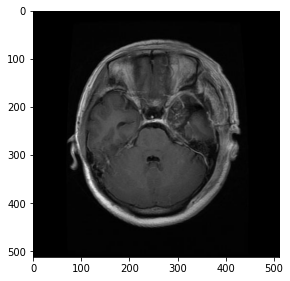

Images of glioma tumor: A type of tumour that occurs in the brain and spinal cord.


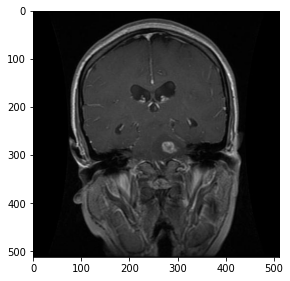

In [ ]:
import glob, os
    
for file in glob.glob("/content/Training/glioma_tumor/*.jpg")[0:3]:
    print('Images of glioma tumor: A type of tumour that occurs in the brain and spinal cord.')
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.subplot(3,3,2)
    plt.imshow(im)
    plt.show()

Images of glioma tumor: A usually non-cancerous tumour that arises from the membranes surrounding the brain and spinal cord..


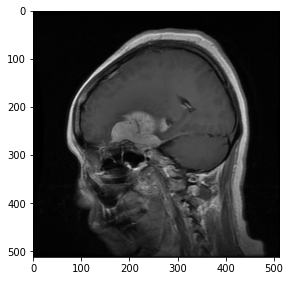

Images of glioma tumor: A usually non-cancerous tumour that arises from the membranes surrounding the brain and spinal cord..


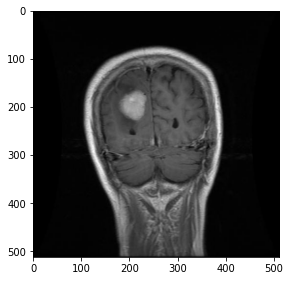

Images of glioma tumor: A usually non-cancerous tumour that arises from the membranes surrounding the brain and spinal cord..


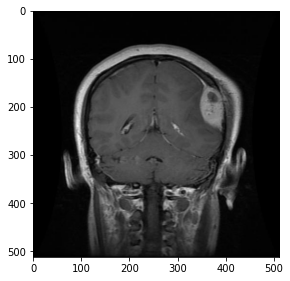

In [ ]:
for file in glob.glob("/content/Training/meningioma_tumor/*.jpg")[0:3]:
    print('Images of glioma tumor: A usually non-cancerous tumour that arises from the membranes surrounding the brain and spinal cord..')
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.subplot(3,3,2)
    plt.imshow(im)
    plt.show()

Images of no tumor


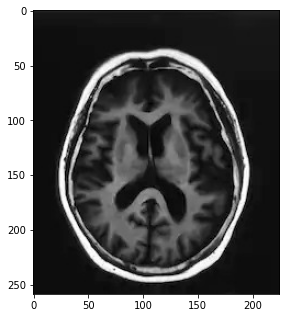

Images of no tumor


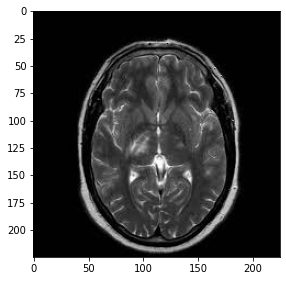

Images of no tumor


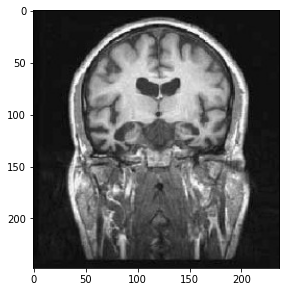

In [ ]:
for file in glob.glob("/content/Training/no_tumor/*.jpg")[0:3]:
    print('Images of no tumor')
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.subplot(3,3,2)
    plt.imshow(im)
    plt.show()

Images of pituitory tumor: Non-cancerous tumours in the pituitary gland that do not spread beyond the skull.


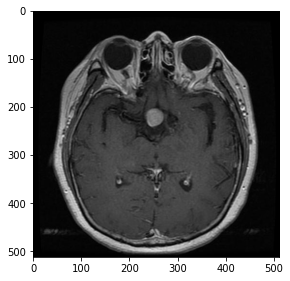

Images of pituitory tumor: Non-cancerous tumours in the pituitary gland that do not spread beyond the skull.


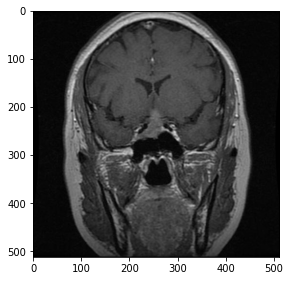

Images of pituitory tumor: Non-cancerous tumours in the pituitary gland that do not spread beyond the skull.


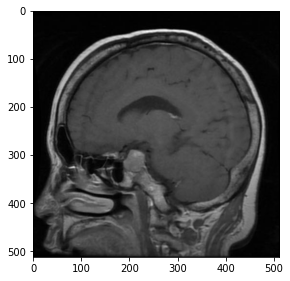

In [ ]:
for file in glob.glob("/content/Training/pituitary_tumor/*.jpg")[0:3]:
    print('Images of pituitory tumor: Non-cancerous tumours in the pituitary gland that do not spread beyond the skull.')
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.subplot(3,3,2)
    plt.imshow(im)
    plt.show()

####5. Fine - tuning convolutional layers





Step 1. Load in pretrained weights from the VGG16 network trained on a large dataset (ImageNet). 

>Many pretrained models are available in keras.

>We will remove the dense connected layers of pre-trained weights using **include_top=False** since the dataset used to train pre-trained weights are different than the dataset that we use

In [ ]:
#Load in pretrained weights from the VGG16 network trained on a large dataset (ImageNet). 
base_model = vgg16.VGG16(weights="imagenet", include_top=False,
                         input_shape=(224,224,3),pooling='avg')


Step 2: Layer freeze

> We will not re-train the convolutional layers that are used to extract the image features.

> The layer freezing is done by trial and error method.

> In this case, since our dataset is related to medical database and the dataset used for the pre-trained weights is generic. So I have decided to keep only a few initial conv layers which are trained for the feature extraction.


> For example: (VGG16 has 13 conv layers, I will freeze (13-5) 8 layers)

In [ ]:
for layer in base_model.layers[:-5]:
  layer.trainable=False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#prints the model layers name
for layer in base_model.layers:
    print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
global_average_pooling2d_2


In [ ]:
#use "get_layer" method to save the last layer of the network
last_layer = base_model.get_layer('global_average_pooling2d_2')

#save the output of the last layer to be the input of the next layer
last_output=last_layer.output

#add our new softmax layer with the 3 hidden units
x =Dense(4, activation='softmax',name='softmax')(last_output)

#instantiate a new model using keras model class
new_model = Model(inputs=base_model.input, outputs=x)

#print the new model summary
new_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

####6. Compiling the model

In [ ]:
#we will keep learning rate as low as possible
new_model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',
                  metrics=['accuracy'])


from keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='braintumor.model.hdf5',
                                            save_best_only=True)

history = new_model.fit_generator(train_batches,steps_per_epoch=18,
                                  validation_data=valid_batches, validation_steps=3,
                                  epochs=200, verbose=1, callbacks=[checkpointer])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
18/18 [==============================] - 4s 171ms/step - loss: 4.3424 - accuracy: 0.3462 - val_loss: 1.5240 - val_accuracy: 0.3111
Epoch 2/200
18/18 [==============================] - 1s 67ms/step - loss: 1.3233 - accuracy: 0.4836 - val_loss: 1.5208 - val_accuracy: 0.3000
Epoch 3/200
18/18 [==============================] - 1s 69ms/step - loss: 0.8961 - accuracy: 0.5331 - val_loss: 2.0853 - val_accuracy: 0.3222
Epoch 4/200
18/18 [==============================] - 1s 66ms/step - loss: 1.1453 - accuracy: 0.5127 - val_loss: 1.4780 - val_accuracy: 0.4111
Epoch 5/200
18/18 [==============================] - 1s 66ms/step - loss: 1.0202 - accuracy: 0.5784 - val_loss: 1.5165 - val_accuracy: 0.2889
Epoch 6/200
18/18 [==============================] - 1s 66ms/step - loss: 0.9038 - accuracy: 0.5734 - val_loss: 2.1553 - val_accuracy: 0.4444
Epoch 7/200
18/18 [==============================] - 1s 66ms/step - loss: 0.6703 - accuracy: 0.8141 - val_loss: 1.5272 - val_accuracy: 0.4333
Epoch

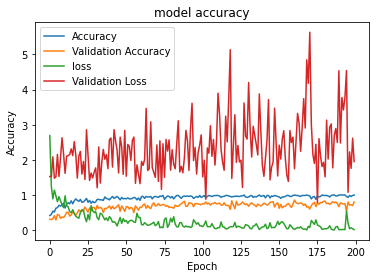

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
#test classes
print(test_batches.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3]


####7. Model prediction

In [ ]:
#prediction on the test dataset
prediction = new_model.predict(test_batches)


In [ ]:
import numpy as np
predictions = np.argmax(prediction,axis=1)

print(predictions)

[0 1 0 0 2 2 1 1 0 0 2 2 1 1 0 0 2 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 2 0 2 2 1 0 2 2 2 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 2 1
 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 1 0 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 0 0 1 3 3 3 3 3 3]


In [ ]:
#confusion matrix 
from sklearn import metrics

print(metrics.confusion_matrix(test_batches.classes,predictions))


target_names = ['class 0: glioma_tumor','class 1: meningioma_tumor','class 2: no_tumor','class 3: pituitary_tumor']

print(metrics.classification_report(test_batches.classes,predictions,target_names = target_names))

[[27 12 11  0]
 [ 2 55  0  1]
 [ 3  3 47  0]
 [ 3  2  0 32]]
                           precision    recall  f1-score   support

    class 0: glioma_tumor       0.77      0.54      0.64        50
class 1: meningioma_tumor       0.76      0.95      0.85        58
        class 2: no_tumor       0.81      0.89      0.85        53
 class 3: pituitary_tumor       0.97      0.86      0.91        37

                 accuracy                           0.81       198
                macro avg       0.83      0.81      0.81       198
             weighted avg       0.82      0.81      0.81       198

